In [38]:
import pandas as pd
import numpy as np

In [5]:
survey_raw_df = pd.read_csv('C:/Users/RAVINDRA/Downloads/developer_survey_2020/survey_results_public.csv')

In [6]:
survey_raw_df.head()

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8


In [7]:
survey_raw_df.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'Age', 'Age1stCode', 'CompFreq',
       'CompTotal', 'ConvertedComp', 'Country', 'CurrencyDesc',
       'CurrencySymbol', 'DatabaseDesireNextYear', 'DatabaseWorkedWith',
       'DevType', 'EdLevel', 'Employment', 'Ethnicity', 'Gender', 'JobFactors',
       'JobSat', 'JobSeek', 'LanguageDesireNextYear', 'LanguageWorkedWith',
       'MiscTechDesireNextYear', 'MiscTechWorkedWith',
       'NEWCollabToolsDesireNextYear', 'NEWCollabToolsWorkedWith', 'NEWDevOps',
       'NEWDevOpsImpt', 'NEWEdImpt', 'NEWJobHunt', 'NEWJobHuntResearch',
       'NEWLearn', 'NEWOffTopic', 'NEWOnboardGood', 'NEWOtherComms',
       'NEWOvertime', 'NEWPurchaseResearch', 'NEWPurpleLink', 'NEWSOSites',
       'NEWStuck', 'OpSys', 'OrgSize', 'PlatformDesireNextYear',
       'PlatformWorkedWith', 'PurchaseWhat', 'Sexuality', 'SOAccount',
       'SOComm', 'SOPartFreq', 'SOVisitFreq', 'SurveyEase', 'SurveyLength',
       'Trans', 'UndergradMajor', 'WebframeDesireNextYear',
  

Data Preparation & Cleaning

In [8]:
selected_columns = [
    # Demographics
    'Country',
    'Age',
    'Gender',
    'EdLevel',
    'UndergradMajor',
    # Programming experience
    'Hobbyist',
    'Age1stCode',
    'YearsCode',
    'YearsCodePro',
    'LanguageWorkedWith',
    'LanguageDesireNextYear',
    'NEWLearn',
    'NEWStuck',
    # Employment
    'Employment',
    'DevType',
    'WorkWeekHrs',
    'JobSat',
    'JobFactors',
    'NEWOvertime',
    'NEWEdImpt'
]

In [9]:
selected_columns

['Country',
 'Age',
 'Gender',
 'EdLevel',
 'UndergradMajor',
 'Hobbyist',
 'Age1stCode',
 'YearsCode',
 'YearsCodePro',
 'LanguageWorkedWith',
 'LanguageDesireNextYear',
 'NEWLearn',
 'NEWStuck',
 'Employment',
 'DevType',
 'WorkWeekHrs',
 'JobSat',
 'JobFactors',
 'NEWOvertime',
 'NEWEdImpt']

Extracting a copy of the data from these columns into a new data frame `survey_df`.

In [10]:
survey_df = survey_raw_df[selected_columns].copy()

In [12]:
survey_df.head(3)

,Country,Age,Gender,EdLevel,UndergradMajor,Hobbyist,Age1stCode,YearsCode,YearsCodePro,LanguageWorkedWith,LanguageDesireNextYear,NEWLearn,NEWStuck,Employment,DevType,WorkWeekHrs,JobSat,JobFactors,NEWOvertime,NEWEdImpt
0,Germany,NaN,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,13,36,27,C#;HTML/CSS;JavaScript,C#;HTML/CSS;JavaScript,Once a year,Visit Stack Overflow;Go for a walk or other ph...,"Independent contractor, freelancer, or self-em...","Developer, desktop or enterprise applications;...",50.0,Slightly satisfied,"Languages, frameworks, and other technologies ...",Often: 1-2 days per week or more,Fairly important
1,United Kingdom,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",No,19,7,4,JavaScript;Swift,Python;Swift,Once a year,Visit Stack Overflow;Go for a walk or other ph...,Employed full-time,"Developer, full-stack;Developer, mobile",NaN,Very dissatisfied,NaN,NaN,Fairly important
2,Russian Federation,NaN,NaN,NaN,NaN,Yes,15,4,NaN,Objective-C;Python;Swift,Objective-C;Python;Swift,Once a decade,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 64072 non-null  object 
 1   Age                     45446 non-null  float64
 2   Gender                  50557 non-null  object 
 3   EdLevel                 57431 non-null  object 
 4   UndergradMajor          50995 non-null  object 
 5   Hobbyist                64416 non-null  object 
 6   Age1stCode              57900 non-null  object 
 7   YearsCode               57684 non-null  object 
 8   YearsCodePro            46349 non-null  object 
 9   LanguageWorkedWith      57378 non-null  object 
 10  LanguageDesireNextYear  54113 non-null  object 
 11  NEWLearn                56156 non-null  object 
 12  NEWStuck                54983 non-null  object 
 13  Employment              63854 non-null  object 
 14  DevType                 49370 non-null

In [14]:
survey_df.describe()

,Age,WorkWeekHrs
count,45446.000000,41151.000000
mean,30.834111,40.782174
std,9.585392,17.816383
min,1.000000,1.000000
25%,24.000000,40.000000
50%,29.000000,40.000000
75%,35.000000,44.000000
max,279.000000,475.000000


Only two of the columns were detected as numeric columns (`Age` and `WorkWeekHrs`), even though a few other columns have mostly numeric values. To make analysis easier, converting some other columns into numeric data types while ignoring any non-numeric value. The non-numeric are converted to `NaN`

In [15]:
survey_df['Age1stCode'] = pd.to_numeric(survey_df.Age1stCode, errors='coerce')
survey_df['YearsCode'] = pd.to_numeric(survey_df.YearsCode, errors='coerce')
survey_df['YearsCodePro'] = pd.to_numeric(survey_df.YearsCodePro, errors='coerce')

There seems to be a problem with the age column, as the minimum value is 1 and the maximum is 279. Responses may contain invalid values due to accidental or intentional errors while responding. A simple fix would be to ignore the rows where the age is higher than 100 years or lower than 10 years as invalid survey responses. We can do this using the .drop method

In [16]:
survey_df.drop(survey_df[survey_df.Age < 10].index, inplace=True)
survey_df.drop(survey_df[survey_df.Age > 100].index, inplace=True)

The same holds for `WorkWeekHrs`. Ignoring entries where the value for the column is higher than 140 hours. (~20 hours per day).

In [18]:
survey_df.drop(survey_df[survey_df.WorkWeekHrs > 140].index, inplace=True)

In [19]:
survey_df['Gender'].value_counts()

Man                                                            45895
Woman                                                           3835
Non-binary, genderqueer, or gender non-conforming                385
Man;Non-binary, genderqueer, or gender non-conforming            121
Woman;Non-binary, genderqueer, or gender non-conforming           92
Woman;Man                                                         73
Woman;Man;Non-binary, genderqueer, or gender non-conforming       25
Name: Gender, dtype: int64

The gender column also allows for picking multiple options. We'll remove values containing more than one option to simplify our analysis.

In [21]:
import numpy as np

In [22]:
survey_df.where(~(survey_df.Gender.str.contains(';', na=False)), np.nan, inplace=True)

We've now cleaned up and prepared the dataset for analysis.

In [23]:
survey_df.sample(5)

,Country,Age,Gender,EdLevel,UndergradMajor,Hobbyist,Age1stCode,YearsCode,YearsCodePro,LanguageWorkedWith,LanguageDesireNextYear,NEWLearn,NEWStuck,Employment,DevType,WorkWeekHrs,JobSat,JobFactors,NEWOvertime,NEWEdImpt
61389,France,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Employed full-time,NaN,NaN,NaN,NaN,NaN,NaN
31211,Switzerland,23.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,10.0,9.0,NaN,C;C#;Java;Kotlin;Python,C#;Kotlin;Rust,Every few months,Visit Stack Overflow;Do other work and come ba...,Student,NaN,NaN,NaN,NaN,NaN,NaN
46298,Austria,55.0,Man,Some college/university study without earning ...,NaN,Yes,13.0,42.0,20.0,Bash/Shell/PowerShell;C;C++;HTML/CSS;JavaScrip...,C;C++;Dart;Java;JavaScript;Perl;PHP;SQL,Every few months,Call a coworker or friend;Visit Stack Overflow...,NaN,NaN,42.0,NaN,Diversity of the company or organization;Flex ...,Often: 1-2 days per week or more,Somewhat important
50598,Hungary,29.0,Man,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",No,13.0,16.0,7.0,HTML/CSS;JavaScript;TypeScript,HTML/CSS;JavaScript;TypeScript,Once every few years,Call a coworker or friend;Visit Stack Overflow...,"Independent contractor, freelancer, or self-em...","Developer, front-end;Developer, full-stack;Dev...",25.0,Very dissatisfied,Flex time or a flexible schedule;Remote work o...,Sometimes: 1-2 days per month but less than we...,Somewhat important
52164,Spain,NaN,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,14.0,20.0,17.0,Bash/Shell/PowerShell;HTML/CSS;Java;JavaScript...,Bash/Shell/PowerShell;HTML/CSS;Java;JavaScript...,Once a year,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,"Academic researcher;Developer, full-stack;Engi...",37.0,Slightly satisfied,"Languages, frameworks, and other technologies ...",Rarely: 1-2 days per year or less,Critically important


#### Exploratory Analysis and Visualization

In [24]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

Matplotlib is building the font cache; this may take a moment.


In [25]:
survey_df.Country.nunique()

183

In [26]:
top_countries = survey_df.Country.value_counts().head(15)
top_countries

United States         12371
India                  8364
United Kingdom         3881
Germany                3864
Canada                 2175
France                 1884
Brazil                 1804
Netherlands            1332
Poland                 1259
Australia              1199
Spain                  1157
Italy                  1115
Russian Federation     1085
Sweden                  879
Pakistan                802
Name: Country, dtype: int64

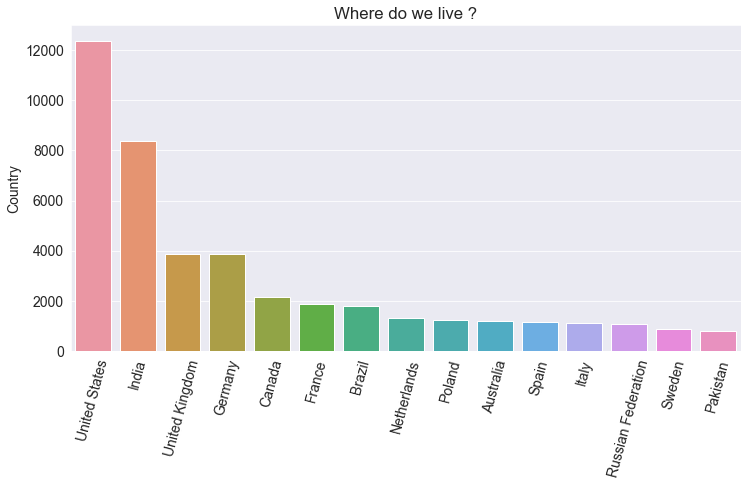

In [28]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=75)
plt.title('Where do we live ?')
sns.barplot(x=top_countries.index, y=top_countries);

### Age

The distribution of respondents' age is another crucial factor to look at. We can use a histogram to visualize it. 

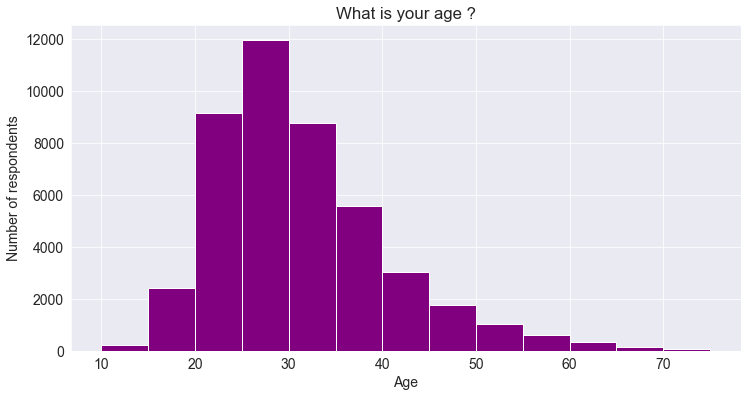

In [29]:
plt.figure(figsize=(12, 6))
plt.title('What is your age ?')
plt.xlabel('Age')
plt.ylabel('Number of respondents')

plt.hist(survey_df.Age, bins=np.arange(10,80,5), color='purple');

#### Gender

In [30]:
gender_counts = survey_df.Gender.value_counts()
gender_counts

Man                                                  45895
Woman                                                 3835
Non-binary, genderqueer, or gender non-conforming      385
Name: Gender, dtype: int64

A pie visualization for the gender distribution.

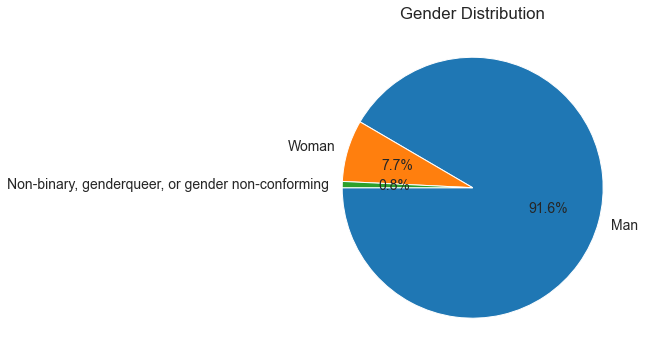

In [32]:
plt.figure(figsize=(12,6))
plt.title('Gender Distribution')
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=180);

#### Education Level

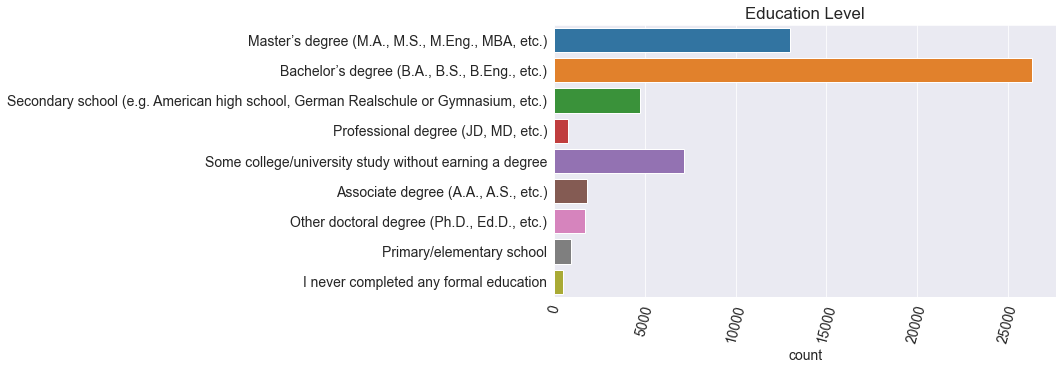

In [33]:
sns.countplot(y=survey_df.EdLevel)
plt.xticks(rotation=75);
plt.title('Education Level')
plt.ylabel(None);

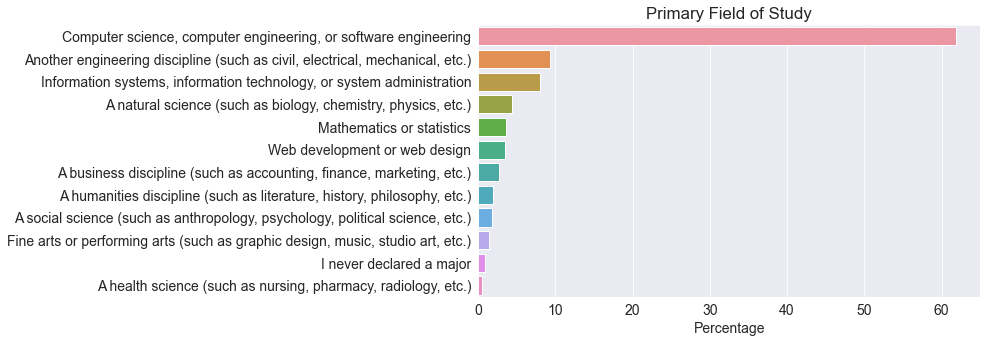

In [34]:
undergrad_pct = survey_df.UndergradMajor.value_counts() * 100 / survey_df.UndergradMajor.count()

sns.barplot(x=undergrad_pct, y=undergrad_pct.index)

plt.title('Primary Field of Study')
plt.ylabel(None);
plt.xlabel('Percentage');

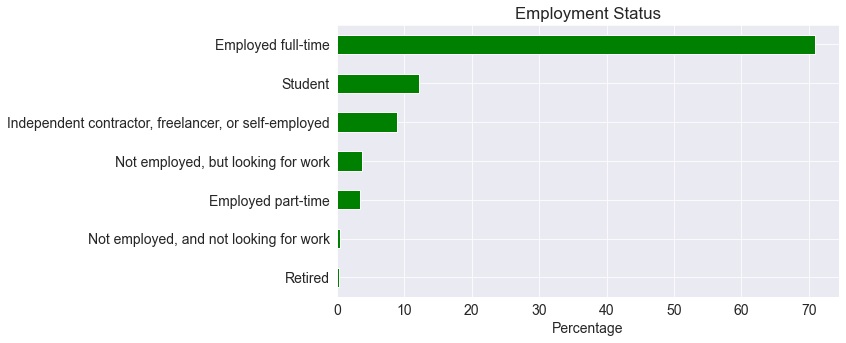

In [35]:
(survey_df.Employment.value_counts(normalize=True, ascending=True)*100).plot(kind='barh', color='g')
plt.title('Employment Status')
plt.xlabel('Percentage');

Defining a helper function that turns a column containing lists of values into a data frame with one column for each possible option.

In [44]:
def split_multicolumn(col_series):
    result_df = col_series.to_frame()
    options = []
    # Iterate over the column
    for idx, value  in col_series[col_series.notnull()].iteritems():
        # Break each value into list of options
        for option in value.split(';'):
            # Add the option as a column to result
            if not option in result_df.columns:
                options.append(option)
                result_df[option] = False
            # Mark the value in the option column as True
            result_df.at[idx, option] = True
    return result_df[options]

#### Let's find the most popular programming languages in 2020? 

To answer, this we can use the `LanguageWorkedWith` column.

In [36]:
survey_df.LanguageWorkedWith

0                                   C#;HTML/CSS;JavaScript
1                                         JavaScript;Swift
2                                 Objective-C;Python;Swift
3                                                      NaN
4                                        HTML/CSS;Ruby;SQL
                               ...                        
64456                                                  NaN
64457    Assembly;Bash/Shell/PowerShell;C;C#;C++;Dart;G...
64458                                                  NaN
64459                                             HTML/CSS
64460                      C#;HTML/CSS;Java;JavaScript;SQL
Name: LanguageWorkedWith, Length: 64306, dtype: object

First, we'll split this column into a data frame containing a column of each language listed in the options.

In [45]:
languages_worked_df = split_multicolumn(survey_df.LanguageWorkedWith)

In [46]:
languages_worked_df.head()

,C#,HTML/CSS,JavaScript,Swift,Objective-C,Python,Ruby,SQL,Java,PHP,...,VBA,Perl,Scala,C++,Go,Haskell,Rust,Dart,Julia,Assembly
0,True,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,True,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,True,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,True,False,False,False,False,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False


There are 25 languages included among the options. Aggregating these to identify the percentage of respondents who selected each language.


In [47]:
languages_worked_percentages = languages_worked_df.mean().sort_values(ascending=False) * 100
languages_worked_percentages

JavaScript               59.893323
HTML/CSS                 55.801947
SQL                      48.444935
Python                   39.001026
Java                     35.618760
Bash/Shell/PowerShell    29.239884
C#                       27.803004
PHP                      23.130035
TypeScript               22.461357
C++                      21.114670
C                        19.236152
Go                        7.758219
Kotlin                    6.887382
Ruby                      6.229590
Assembly                  5.447392
VBA                       5.394520
Swift                     5.226573
R                         5.064846
Rust                      4.498803
Objective-C               3.603085
Dart                      3.517557
Scala                     3.150561
Perl                      2.757130
Haskell                   1.861413
Julia                     0.782198
dtype: float64

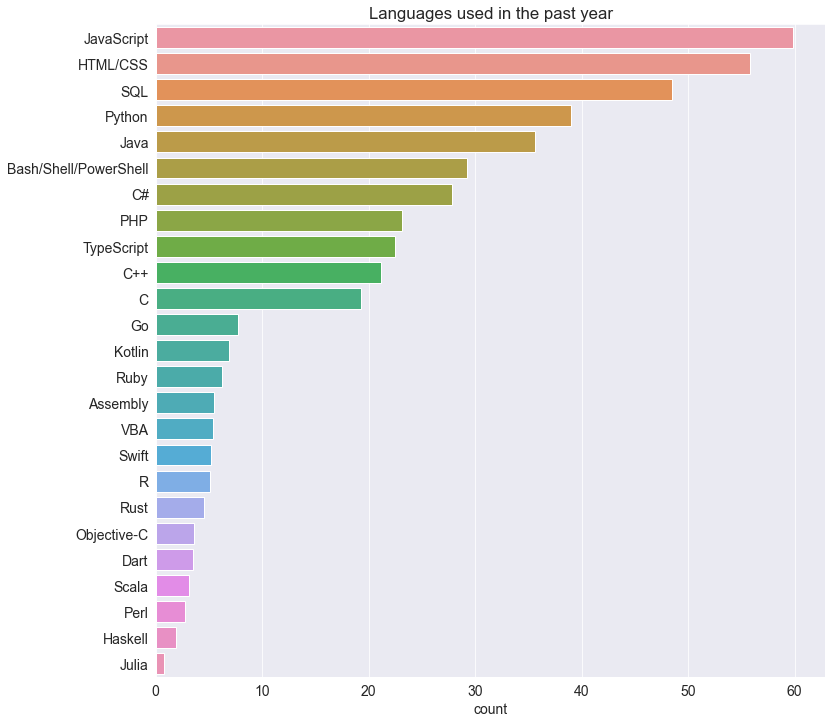

In [48]:
plt.figure(figsize=(12, 12))
sns.barplot(x=languages_worked_percentages, y=languages_worked_percentages.index)
plt.title("Languages used in the past year");
plt.xlabel('count');

Javascript & HTML/CSS comes out at the top as web development is one of today's most sought skills. It also happens to be one of the easiest to get started. SQL is necessary for working with relational databases, so it's no surprise that most programmers work with SQL regularly. Python seems to be the popular choice for other forms of development, beating out Java.


#### Languages that most people are interested to learn over the next year?

For this, we can use the `LanguageDesireNextYear` column, with similar processing as the previous one.

In [49]:
languages_interested_df = split_multicolumn(survey_df.LanguageDesireNextYear)
languages_interested_percentages = languages_interested_df.mean().sort_values(ascending=False) * 100
languages_interested_percentages

Python                   41.143906
JavaScript               40.425466
HTML/CSS                 32.028116
SQL                      30.799614
TypeScript               26.451653
C#                       21.058688
Java                     20.464653
Go                       19.432090
Bash/Shell/PowerShell    18.057413
Rust                     16.270643
C++                      15.014151
Kotlin                   14.760676
PHP                      10.947657
C                         9.359935
Swift                     8.692812
Dart                      7.308805
R                         6.571704
Ruby                      6.425528
Scala                     5.326097
Haskell                   4.593662
Assembly                  3.766367
Julia                     2.540976
Objective-C               2.338818
Perl                      1.761888
VBA                       1.611047
dtype: float64

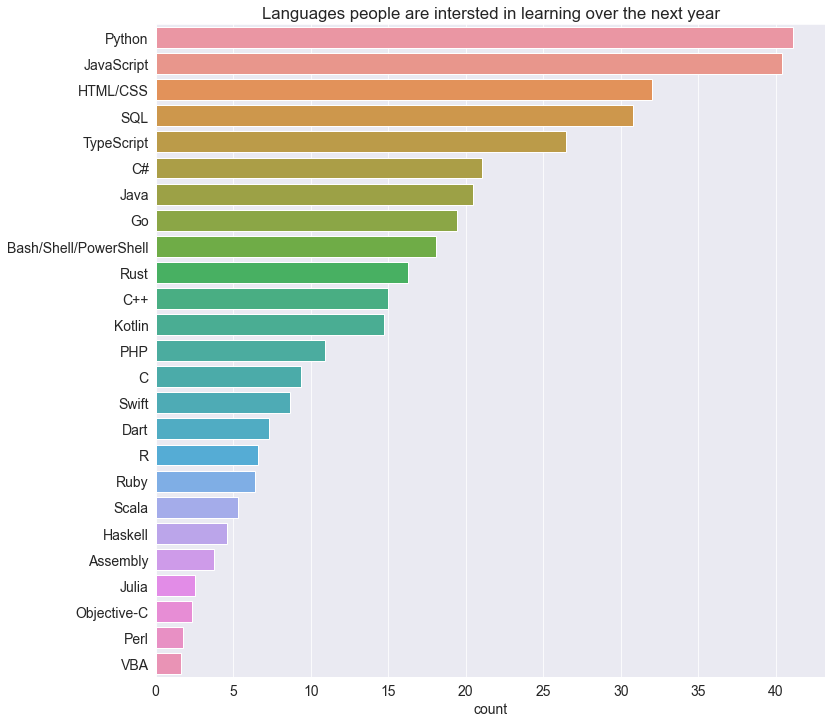

In [50]:
plt.figure(figsize=(12, 12))
sns.barplot(x=languages_interested_percentages, y=languages_interested_percentages.index)
plt.title("Languages people are intersted in learning over the next year");
plt.xlabel('count');

####  Countries in which developers work the highest number of hours per week.

To answer this, we'll need to use the `groupby` data frame method to aggregate the rows for each country. We'll also need to filter the results to only include the countries with more than 250 respondents.

In [51]:
countries_df = survey_df.groupby('Country')[['WorkWeekHrs']].mean().sort_values('WorkWeekHrs', ascending=False)

In [52]:
high_response_countries_df = countries_df.loc[survey_df.Country.value_counts() > 250].head(15)

In [53]:
high_response_countries_df

,WorkWeekHrs
Country,
Iran,44.337748
Israel,43.915094
China,42.150000
United States,41.802982
Greece,41.402724
Viet Nam,41.391667
South Africa,41.023460
Turkey,40.982143
Sri Lanka,40.612245


The Asian countries like Iran, China, and Israel have the highest working hours, followed by the United States. However, there isn't too much variation overall, and the average working hours seem to be around 40 hours per week.

Creating a scatter plot of `Age` vs. `YearsCodePro` (i.e., years of coding experience) to answer this question.

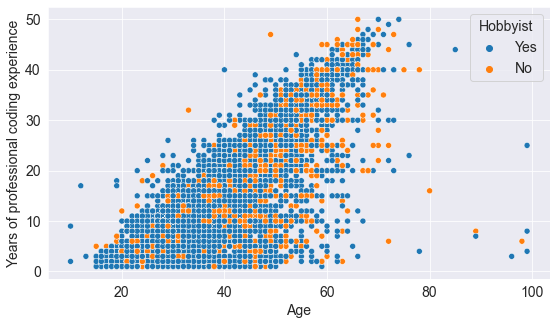

In [54]:
sns.scatterplot(x='Age', y='YearsCodePro', hue='Hobbyist', data=survey_df)
plt.xlabel("Age")
plt.ylabel("Years of professional coding experience");

You can see points all over the graph, which indicates that you can **start programming professionally at any age**. Many people who have been coding for several decades professionally also seem to enjoy it as a hobby.